In [54]:
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Utilities

In [55]:
def convert_to_array(string):
    string = string.replace("\n", "").replace("[", "").replace("]", "").replace(" ", "").split(",")
    result = []
    for item in string:
        result.append(float(item))
    return np.array(result)

# Data Processing

In [56]:
data = pd.read_csv('www.daraz.pk_QSS_test.csv', index_col=0)
data.shape

(116, 7)

In [57]:
data.head()

,IAS,Area,Location,Original Size,QSS,SSIM,Our QSS
0,0.000000,0.000000,0.000000,1.000000,0.148404,0.979342,0.678937
1,0.004267,0.060133,0.090078,0.075688,0.888894,0.964972,0.867453
2,0.085885,0.079689,0.030037,0.053229,0.837187,0.956480,0.756570
3,0.035456,0.039089,0.072917,0.023284,0.900520,0.979913,0.578056
4,0.090257,0.088336,0.042452,0.059833,0.863981,0.983492,0.689766


In [58]:
for i, r in data.iterrows():
    if r["Our QSS"] > 0.75:
        data.loc[i, "Threshold"] = ">0.75"
    elif r["Our QSS"] > 0.5:
        data.loc[i, "Threshold"] = ">0.5 & <0.75"
    elif r["Our QSS"] > 0.25:
        data.loc[i, "Threshold"] = ">0.25 & <0.5"
    elif r["Our QSS"] < 0.25:
        data.loc[i, "Threshold"] = "<0.25"

In [59]:
data.head()

,IAS,Area,Location,Original Size,QSS,SSIM,Our QSS,Threshold
0,0.000000,0.000000,0.000000,1.000000,0.148404,0.979342,0.678937,>0.5 & <0.75
1,0.004267,0.060133,0.090078,0.075688,0.888894,0.964972,0.867453,>0.75
2,0.085885,0.079689,0.030037,0.053229,0.837187,0.956480,0.756570,>0.75
3,0.035456,0.039089,0.072917,0.023284,0.900520,0.979913,0.578056,>0.5 & <0.75
4,0.090257,0.088336,0.042452,0.059833,0.863981,0.983492,0.689766,>0.5 & <0.75


In [60]:
# for i in range(4):
#     data.iloc[:, i] = data.iloc[:, i].apply(lambda x: convert_to_array(x).mean())
# data.head()

In [61]:
data["Threshold"].value_counts()

>0.5 & <0.75    52
>0.75           48
>0.25 & <0.5    14
<0.25            2
Name: Threshold, dtype: int64

In [62]:
a = data[data['Threshold'] == ">0.75"].iloc[:,:4]
b = data[data['Threshold'] == ">0.5 & <0.75"].iloc[:,:4]
c = data[data['Threshold'] == ">0.25 & <0.5"].iloc[:,:4]
d = data[data['Threshold'] == "<0.25"].iloc[:,:4]

In [63]:
a.head()

,IAS,Area,Location,Original Size
1,0.004267,0.060133,0.090078,0.075688
2,0.085885,0.079689,0.030037,0.053229
8,0.069805,0.039005,0.052544,0.014096
10,0.004444,0.035960,0.053911,0.003629
11,0.052446,0.078595,0.005585,0.034377


In [64]:
# valid_features = valid.iloc[:, [0, 5, 6, 7, 8, 9, 10, 11, 12]]
# invalid_features = invalid.iloc[:, [0, 5, 6, 7, 8, 9, 10, 11, 12]]

In [65]:
acol = []
bcol = []
ccol = []
dcol = []
columns = []
for i in range(4):
    temp = a.iloc[:, i].to_numpy()
    temp = temp/max(temp)
    acol.append(temp)
    
    temp = b.iloc[:, i].to_numpy()
    temp = temp/max(temp)
    bcol.append(temp)
    
    temp = c.iloc[:, i].to_numpy()
    temp = temp/max(temp)
    ccol.append(temp)
    
    temp = d.iloc[:, i].to_numpy()
    temp = temp/max(temp)
    dcol.append(temp)

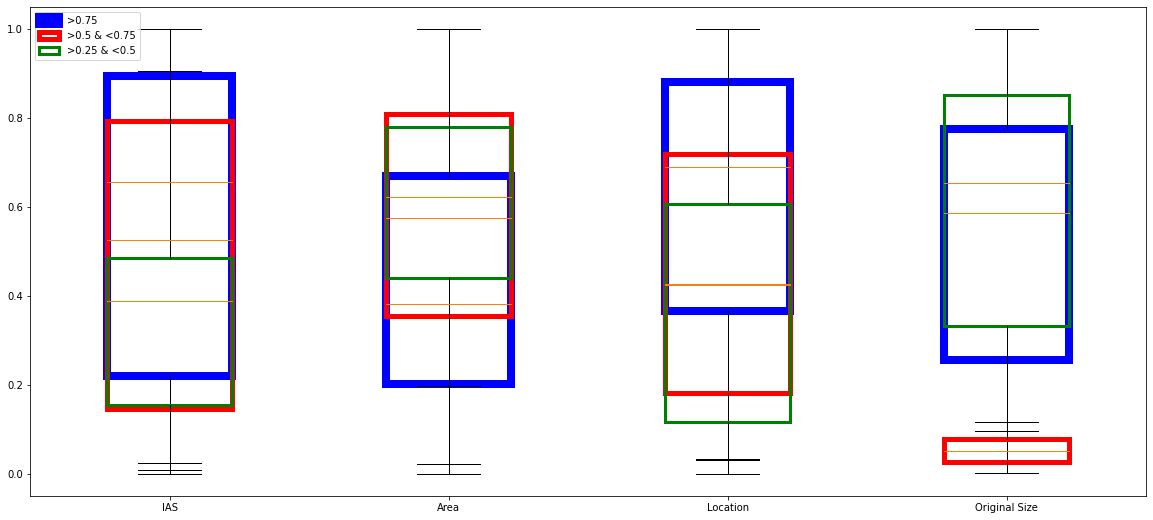

In [66]:
plt.figure(figsize=(20, 9))
bp0 = plt.boxplot(acol, showfliers=False, patch_artist=True)
bp1 = plt.boxplot(bcol, showfliers=False, patch_artist=True)
bp2 = plt.boxplot(ccol, showfliers=False, patch_artist=True)
# bp3 = plt.boxplot(dcol, showfliers=False, patch_artist=True)
for box in bp0['boxes']:
    box.set(color='blue', linewidth=8)
    box.set(facecolor=(0,0,0,0), alpha=None)
for box in bp1['boxes']:
    box.set(color='red', linewidth=5)
    box.set(facecolor=(0,0,0,0), alpha=None)
for box in bp2['boxes']:
    box.set(color='green', linewidth=3)
    box.set(facecolor=(0,0,0,0), alpha=None)
# for box in bp3['boxes']:
#     box.set(color='yellow', linewidth=1)
#     box.set(facecolor=(0,0,0,0), alpha=None)
plt.legend([bp0['boxes'][0], bp1['boxes'][0],bp2['boxes'][0]], ['>0.75', '>0.5 & <0.75', '>0.25 & <0.5'], loc='upper left')
plt.xticks([1,  2,  3,  4], 
           ["IAS","Area","Location","Original Size"])
plt.show()

In [14]:
vf = valid_features.iloc[:, [2, 3, 5]]
invf = invalid_features.iloc[:, [2, 3, 5]]
print(len(vf))
print(len(invf))

NameError: name 'valid_features' is not defined

In [ ]:
def remove_outliers(data):
    df = data
    # Select the first quantile
    for i in df.columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1

        # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
        df = df.query(f'(@Q1 - 1.5 * @IQR) <= {i} <= (@Q3 + 1.5 * @IQR)')
    return df

In [ ]:
vf = remove_outliers(vf)
invf = remove_outliers(invf)
print(len(vf))
print(len(invf))

In [ ]:
vf = vf.sample(n=2288)

In [ ]:
print(len(vf))
print(len(invf))